In [3]:
import pandas as pd

In [5]:
def eda_helper(df):
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        # The null count for a column. Columns with no nulls are generally more interesting
        dict_.update({"null_count" : data.isnull().sum()})
        # Counting the unique values in a column
        # This is useful for seeing how interesting the column might be as a feature
        dict_.update({"unique_count" : len(data.unique())})
        # Finding the types of data in the column
        # This is useful for finding out potential problems with a column having strings and ints
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        #dict_.update({"score" : match[1]})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
    #eda_df = eda_df.sort_values(['null_count','unique_count'], ascending=[True, False])
    return eda_df

In [57]:
data2 = pd.read_csv('/Users/Red/Downloads/2016_campaign_spending.csv')

In [37]:
data2 = data2.dropna()

In [38]:
eda_helper(data2)

,data_type,null_count,unique_count
filing_id,{int64},0,4022
payee,{str},0,33347
street,{str},0,44528
city,{str},0,7051
state,{str},0,56
date,{str},0,317
amount,{float64},0,46104
cat,{str},0,20200
just_year,{float64},0,1
fec_committee_id,{str},0,3614


In [30]:
data2.state.unique()

array(['FL', 'IA', 'WI', 'MO', 'OH', 'SC', 'CA', 'DC', 'UT', 'GA', 'MI',
       'NJ', 'NY', 'MA', 'AL', 'TX', 'VI', 'PA', 'MD', 'VA', 'WA', 'IL',
       'NV', 'KS', 'TN', 'OR', 'KY', 'CT', 'WV', 'NC', 'IN', 'OK', 'MS',
       'LA', 'DE', 'AZ', 'AR', 'MN', 'ME', 'CO', 'NH', 'MT', 'ID', 'HI',
       'VT', 'AK', 'NE', 'SD', 'NM', 'WY', 'RI', 'ND', 'ZZ', 'PR', 'GU',
       'AS', 'NS', 'UN', '33'], dtype=object)

In [32]:
def eda(dataframe):
    # Thank god for ritika's function
    print "Missing Values \n \n", dataframe.isnull().sum(),"\n"
    print "Duplicate Rows \n", dataframe.duplicated().sum(),"\n"
    print "Dataframe Types \n \n", dataframe.dtypes,"\n"
    print "Dataframe Shape \n", dataframe.shape,"\n"
    print "Dataframe Describe \n \n", dataframe.describe(include='all'),"\n"
    for feature in dataframe:
        print feature
        print dataframe[feature].nunique()

In [36]:
data2['state'] = data2['state'].replace({'QC':'ZZ', 'LO':'ZZ', 'AA':'ZZ',
                                         'ON':'ZZ','FR':'ZZ', 'IR':'ZZ','UK':'ZZ',
                                         'AE':'ZZ','BC':'ZZ','MP':'ZZ', '33':'FL', 'Pa':'PA', 'UN':'ZZ','NS':'ZZ'})

In [39]:
data2 = data2.drop_duplicates()

In [41]:
eda(data2)

Missing Values 
 
filing_id           0
payee               0
street              0
city                0
state               0
date                0
amount              0
cat                 0
just_year           0
fec_committee_id    0
committee_name      0
dtype: int64 

Duplicate Rows 
0 

Dataframe Types 
 
filing_id             int64
payee                object
street               object
city                 object
state                object
date                 object
amount              float64
cat                  object
just_year           float64
fec_committee_id     object
committee_name       object
dtype: object 

Dataframe Shape 
(155414, 11) 

Dataframe Describe 
 
           filing_id                       payee         street        city  \
count   1.554140e+05                      155414         155414      155414   
unique           NaN                       33347          44528        7051   
top              NaN  ActBlue Technical Services  366 Summer St  Washin

In [46]:
data2.amount.sum()

906032086.120036

In [58]:
data2[data2.duplicated(keep = False)]

,filing_id,payee,street,city,state,date,amount,cat,just_year,fec_committee_id,committee_name
141,1101709,American Airlines,2500 Victory Ave.,Dallas,TX,2016-03-14,1238.66,Travel Expense,2016.0,C00458976,Terri Sewell for Congress
143,1101709,American Airlines,2500 Victory Ave.,Dallas,TX,2016-03-14,1238.66,Travel Expense,2016.0,C00458976,Terri Sewell for Congress
146,1101709,American Airlines,2500 Victory Ave.,Dallas,TX,2016-03-03,227.10,Travel Expense,2016.0,C00458976,Terri Sewell for Congress
147,1101709,American Airlines,2500 Victory Ave.,Dallas,TX,2016-03-03,227.10,Travel Expense,2016.0,C00458976,Terri Sewell for Congress
148,1101709,American Airlines,2500 Victory Ave.,Dallas,TX,2016-02-11,307.20,Travel Expense,2016.0,C00458976,Terri Sewell for Congress
149,1101709,American Airlines,2500 Victory Ave.,Dallas,TX,2016-02-11,33.92,Travel Expense,2016.0,C00458976,Terri Sewell for Congress
150,1101709,American Airlines,2500 Victory Ave.,Dallas,TX,2016-02-11,33.92,Travel Expense,2016.0,C00458976,Terri Sewell for Congress
151,1101709,American Airlines,2500 Victory Ave.,Dallas,TX,2016-02-11,307.20,Travel Expense,2016.0,C00458976,Terri Sewell for Congress
152,1101709,American Airlines,2500 Victory Ave.,Dallas,TX,2016-02-11,33.92,Travel Expense,2016.0,C00458976,Terri Sewell for Congress
153,1101709,American Airlines,2500 Victory Ave.,Dallas,TX,2016-02-11,307.20,Travel Expense,2016.0,C00458976,Terri Sewell for Congress


In [59]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [71]:
data2.set_index('date', inplace=True)

In [73]:
df1 = pd.DataFrame(data2.amount.groupby(data2.index).sum())

In [67]:
data2.date = data2.date.astype(str)

In [60]:
from statsmodels.tsa.arima_model import AR, ARMA, ARIMA

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [77]:
data2.reset_index(inplace = True)
data2['date'] = pd.to_datetime(data2['date'])

In [79]:
data2.set_index('date', inplace = True)

In [167]:
dfpa = data2[data2.state == 'PA']

In [168]:
dfpa = dfpa['amount']

In [170]:
df1 = pd.DataFrame(dfpa.groupby(dfpa.index).sum())

In [90]:
df1.head()

,amount
date,
2016-01-02,203.96
2016-01-03,678.94
2016-01-04,9150.47
2016-01-05,12000.00
2016-01-06,1500.00


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=1,center=False).mean()
  """Entry point for launching an IPython kernel.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=4,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame

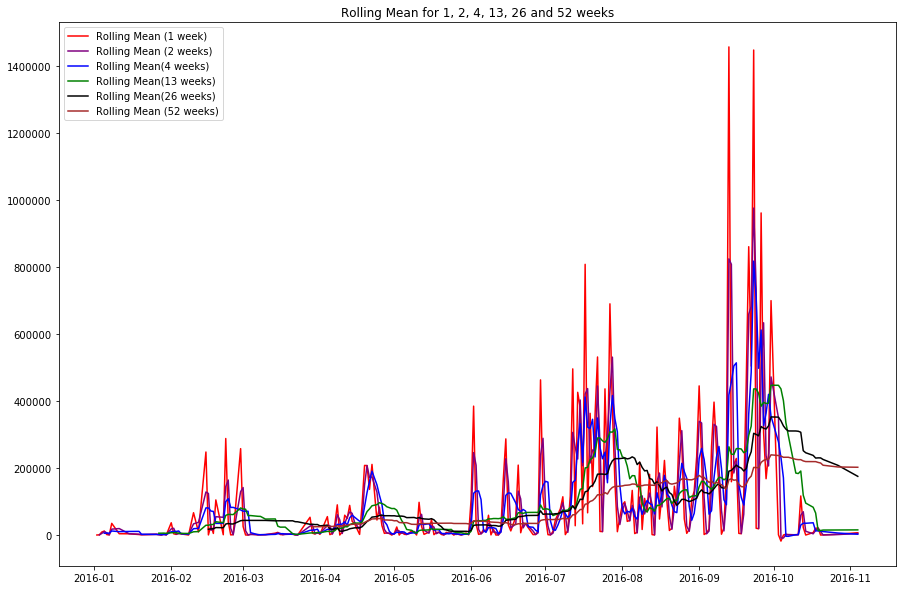

In [94]:
r1 = pd.rolling_mean(df1, window = 1) # Weekly
r2 = pd.rolling_mean(df1, window = 2) # Biweekly
r4 = pd.rolling_mean(df1, window = 4) # Monthly rolling 
r13 = pd.rolling_mean(df1, window = 13) # Quarterly rolling 
r26 = pd.rolling_mean(df1, window = 26) # Half year rolling 
r52 = pd.rolling_mean(df1, window = 52) #yearly

fig = plt.figure(figsize=(15,10))
mean = plt.plot(r1, color='red', label='Rolling Mean (1 week)')
mean = plt.plot(r2, color='purple', label='Rolling Mean (2 weeks)')
mean = plt.plot(r4, color='blue', label='Rolling Mean(4 weeks)')
mean = plt.plot(r13, color='green', label='Rolling Mean(13 weeks)')
mean = plt.plot(r26, color='black', label='Rolling Mean(26 weeks)')
mean = plt.plot(r52, color='brown', label='Rolling Mean (52 weeks)')

plt.legend(loc='best')
plt.title('Rolling Mean for 1, 2, 4, 13, 26 and 52 weeks')
plt.show()

In [146]:
dfmi = data2[data2.state == 'MI']
dfmi = dfmi['amount']

In [147]:
df2 = pd.DataFrame(dfmi.groupby(dfmi.index).sum())

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=1,center=False).mean()
  """Entry point for launching an IPython kernel.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=4,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame

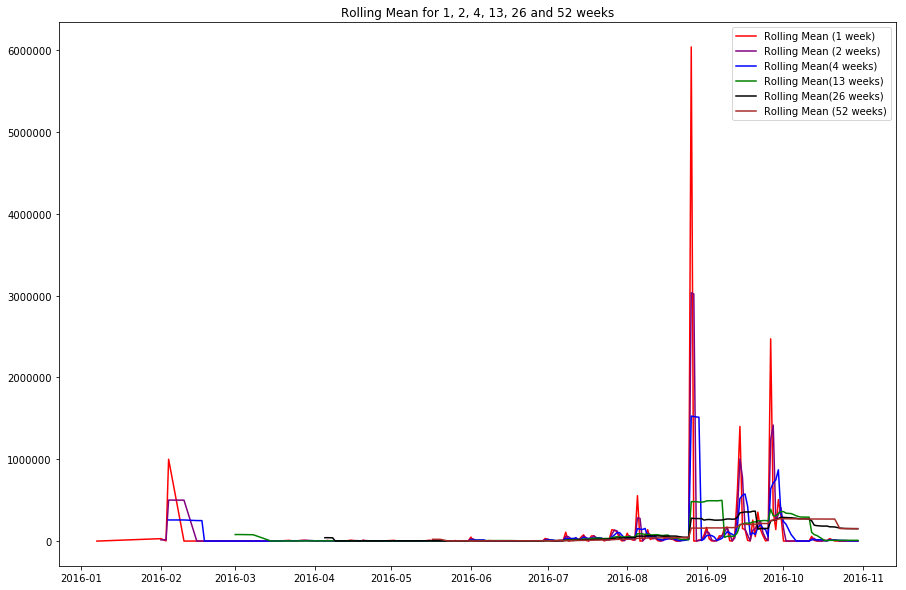

In [148]:
r1 = pd.rolling_mean(df2, window = 1) # Weekly
r2 = pd.rolling_mean(df2, window = 2) # Biweekly
r4 = pd.rolling_mean(df2, window = 4) # Monthly rolling 
r13 = pd.rolling_mean(df2, window = 13) # Quarterly rolling 
r26 = pd.rolling_mean(df2, window = 26) # Half year rolling 
r52 = pd.rolling_mean(df2, window = 52) #yearly

fig = plt.figure(figsize=(15,10))
mean = plt.plot(r1, color='red', label='Rolling Mean (1 week)')
mean = plt.plot(r2, color='purple', label='Rolling Mean (2 weeks)')
mean = plt.plot(r4, color='blue', label='Rolling Mean(4 weeks)')
mean = plt.plot(r13, color='green', label='Rolling Mean(13 weeks)')
mean = plt.plot(r26, color='black', label='Rolling Mean(26 weeks)')
mean = plt.plot(r52, color='brown', label='Rolling Mean (52 weeks)')

plt.legend(loc='best')
plt.title('Rolling Mean for 1, 2, 4, 13, 26 and 52 weeks')
plt.show()

In [202]:
dffl = data2[data2.state == 'FL']
dffl = dffl['amount']

In [203]:
df3 = pd.DataFrame(dffl.groupby(dffl.index).sum())

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=1,center=False).mean()
  """Entry point for launching an IPython kernel.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=4,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame

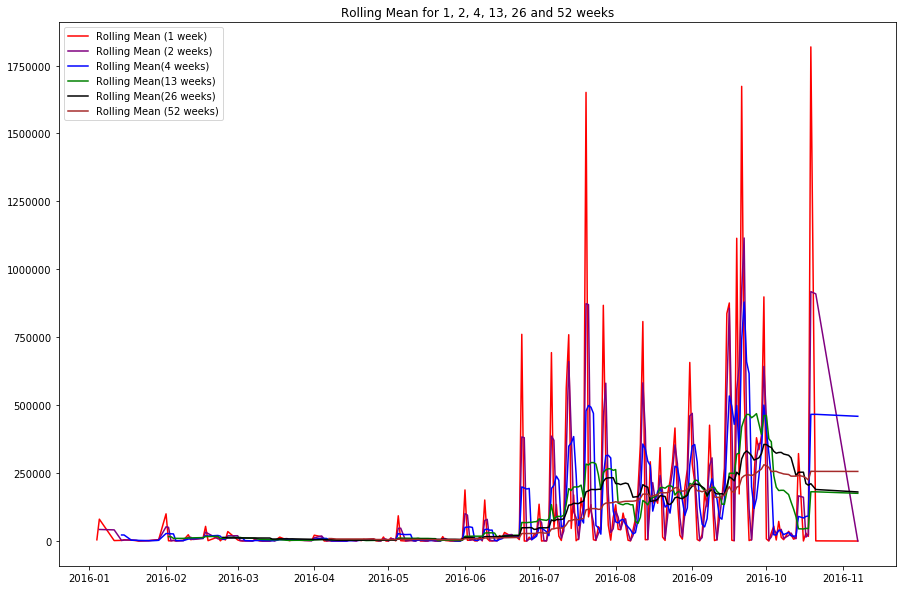

In [204]:
r1 = pd.rolling_mean(df3, window = 1) # Weekly
r2 = pd.rolling_mean(df3, window = 2) # Biweekly
r4 = pd.rolling_mean(df3, window = 4) # Monthly rolling 
r13 = pd.rolling_mean(df3, window = 13) # Quarterly rolling 
r26 = pd.rolling_mean(df3, window = 26) # Half year rolling 
r52 = pd.rolling_mean(df3, window = 52) #yearly

fig = plt.figure(figsize=(15,10))
mean = plt.plot(r1, color='red', label='Rolling Mean (1 week)')
mean = plt.plot(r2, color='purple', label='Rolling Mean (2 weeks)')
mean = plt.plot(r4, color='blue', label='Rolling Mean(4 weeks)')
mean = plt.plot(r13, color='green', label='Rolling Mean(13 weeks)')
mean = plt.plot(r26, color='black', label='Rolling Mean(26 weeks)')
mean = plt.plot(r52, color='brown', label='Rolling Mean (52 weeks)')

plt.legend(loc='best')
plt.title('Rolling Mean for 1, 2, 4, 13, 26 and 52 weeks')
plt.show()

In [153]:
dfoh = data2[data2.state == 'OH']
dfoh = dfoh['amount']

In [154]:
df4 = pd.DataFrame(dfoh.groupby(dfoh.index).sum())

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=1,center=False).mean()
  """Entry point for launching an IPython kernel.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=4,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame

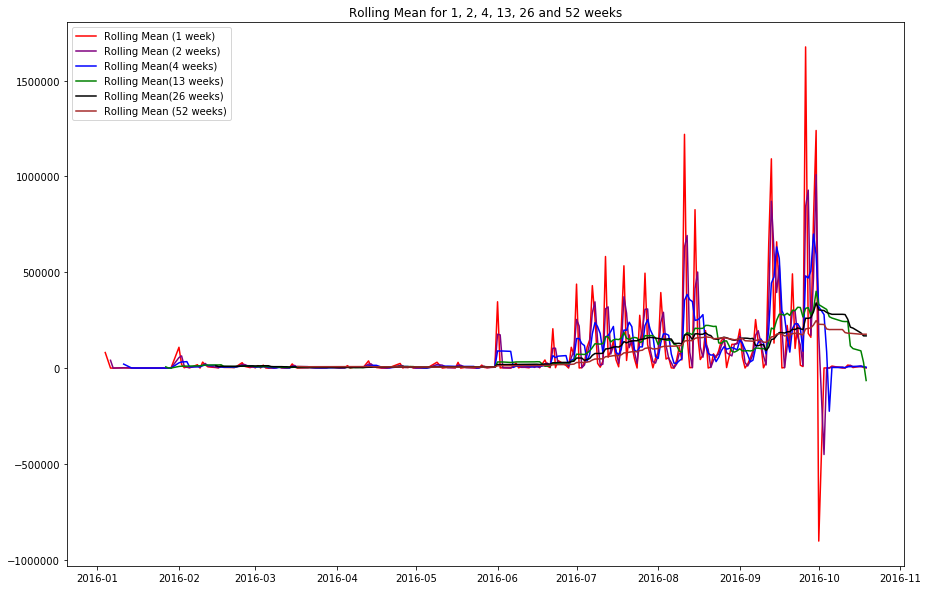

In [155]:
r1 = pd.rolling_mean(df4, window = 1) # Weekly
r2 = pd.rolling_mean(df4, window = 2) # Biweekly
r4 = pd.rolling_mean(df4, window = 4) # Monthly rolling 
r13 = pd.rolling_mean(df4, window = 13) # Quarterly rolling 
r26 = pd.rolling_mean(df4, window = 26) # Half year rolling 
r52 = pd.rolling_mean(df4, window = 52) #yearly

fig = plt.figure(figsize=(15,10))
mean = plt.plot(r1, color='red', label='Rolling Mean (1 week)')
mean = plt.plot(r2, color='purple', label='Rolling Mean (2 weeks)')
mean = plt.plot(r4, color='blue', label='Rolling Mean(4 weeks)')
mean = plt.plot(r13, color='green', label='Rolling Mean(13 weeks)')
mean = plt.plot(r26, color='black', label='Rolling Mean(26 weeks)')
mean = plt.plot(r52, color='brown', label='Rolling Mean (52 weeks)')

plt.legend(loc='best')
plt.title('Rolling Mean for 1, 2, 4, 13, 26 and 52 weeks')
plt.show()

In [158]:
dfva = data2[data2.state == 'VA']
dfva = dfva['amount']

In [159]:
df5 = pd.DataFrame(dfva.groupby(dfva.index).sum())

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=1,center=False).mean()
  """Entry point for launching an IPython kernel.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=4,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame

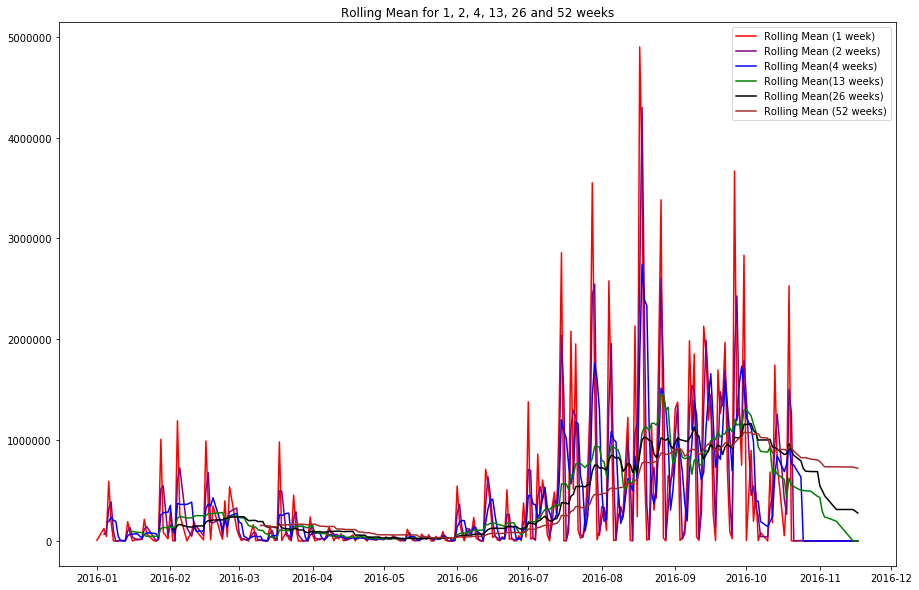

In [160]:
r1 = pd.rolling_mean(df5, window = 1) # Weekly
r2 = pd.rolling_mean(df5, window = 2) # Biweekly
r4 = pd.rolling_mean(df5, window = 4) # Monthly rolling 
r13 = pd.rolling_mean(df5, window = 13) # Quarterly rolling 
r26 = pd.rolling_mean(df5, window = 26) # Half year rolling 
r52 = pd.rolling_mean(df5, window = 52) #yearly

fig = plt.figure(figsize=(15,10))
mean = plt.plot(r1, color='red', label='Rolling Mean (1 week)')
mean = plt.plot(r2, color='purple', label='Rolling Mean (2 weeks)')
mean = plt.plot(r4, color='blue', label='Rolling Mean(4 weeks)')
mean = plt.plot(r13, color='green', label='Rolling Mean(13 weeks)')
mean = plt.plot(r26, color='black', label='Rolling Mean(26 weeks)')
mean = plt.plot(r52, color='brown', label='Rolling Mean (52 weeks)')

plt.legend(loc='best')
plt.title('Rolling Mean for 1, 2, 4, 13, 26 and 52 weeks')
plt.show()

In [194]:
start = '2016-01-04'
end = '2016-11-08'
train = df1.head(201)
test = df1.tail(23)

In [195]:
train_values = train['amount'].values
train_dates = train.index

In [183]:
test_values = test['amount'].values
test_dates = test.index

In [165]:
df4.shape

(224, 1)

In [196]:
arima = ARIMA(endog = train_values, order=(0,1,2), dates = train_dates, freq = 'W').fit()
arima_pred = arima.predict(start=start, end = end)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  200
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2622.203
Method:                       css-mle   S.D. of innovations         119246.825
Date:                Sat, 30 Sep 2017   AIC                           5252.406
Time:                        17:18:37   BIC                           5265.599
Sample:                    01-03-2016   HQIC                          5257.745
                         - 09-03-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        763.7653   1373.327      0.556      0.579   -1927.907    3455.437
ma.L1.D.y     -0.8618      0.068    -12.612      0.000      -0.996      -0.728
ma.L2.D.y      0.0204      0.073      0.281      0.779      -0.122       0.163
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.1941           +0.0000j            1.1941            0.0000
MA.2           41.1227           +0.0000j           41.1227            0.0000
-----------------------------------------------------------------------------
"""

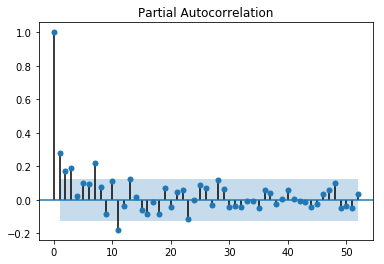

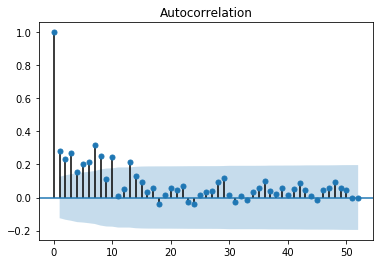

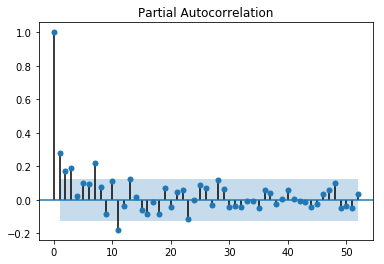

In [197]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1, lags = 52)
plot_pacf(df1, lags = 52)

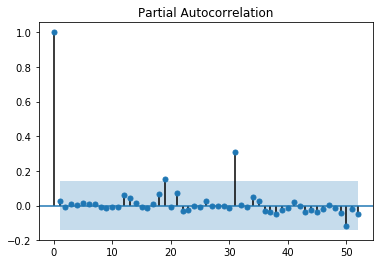

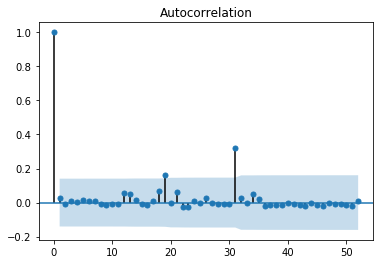

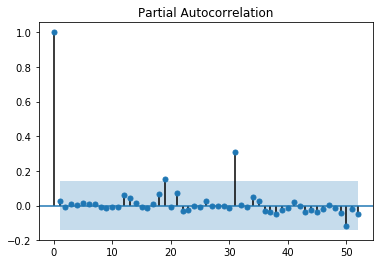

In [198]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df2, lags = 52)
plot_pacf(df2, lags = 52)

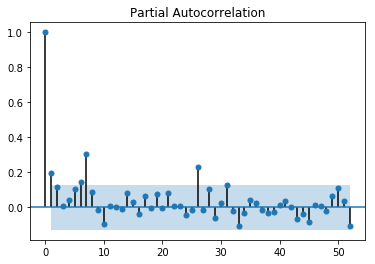

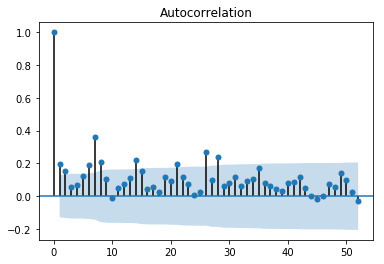

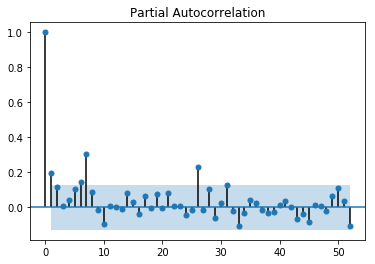

In [205]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df3, lags = 52)
plot_pacf(df3, lags = 52)


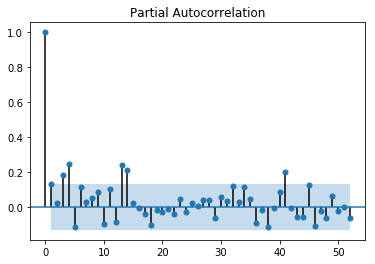

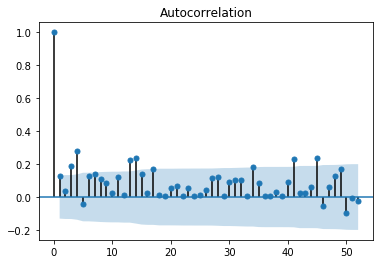

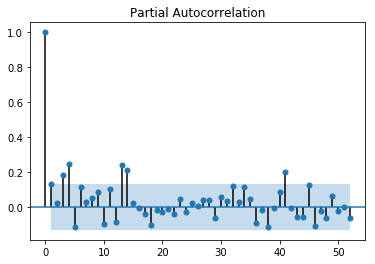

In [206]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df4, lags = 52)
plot_pacf(df4, lags = 52)


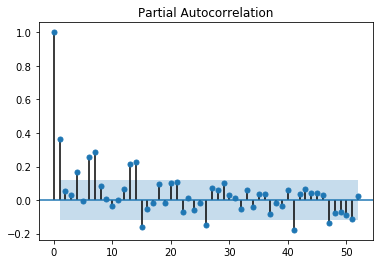

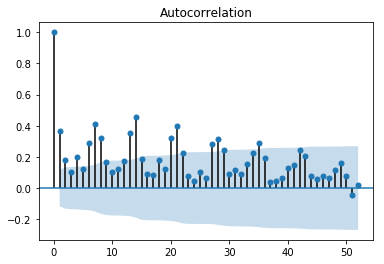

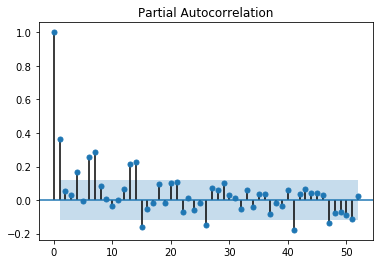

In [207]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df5, lags = 52)
plot_pacf(df5, lags = 52)